## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ameyan","key":"c9a3f7ee8ac8e7a8f0a604f65927d5a1"}'}

In [2]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dog-breed-identification

-rw-r--r-- 1 root root 62 Jul  2 11:36 kaggle.json
  0% 0.00/214k [00:00<?, ?B/s]
100% 214k/214k [00:00<00:00, 82.4MB/s]
  0% 0.00/281k [00:00<?, ?B/s]
100% 281k/281k [00:00<00:00, 92.6MB/s]
 93% 321M/346M [00:03<00:00, 87.1MB/s]
100% 346M/346M [00:03<00:00, 108MB/s] 
 97% 334M/345M [00:02<00:00, 187MB/s]
100% 345M/345M [00:02<00:00, 161MB/s]


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
#project_path = "/content/drive/My Drive/AIML_Project/Dog_breed/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [3]:
#from zipfile import ZipFile
#with ZipFile(project_path+'train.zip', 'r') as z:
#  z.extractall()

#UnZipping the Kaggle Dataset
from zipfile import ZipFile
zip_files = ["labels.csv.zip", "test.zip" ,"train.zip", "sample_submission.csv.zip"]
for files in zip_files:
    with ZipFile(files, "r") as zips:
        zips.extractall()
print("All Files Extracted")

All Files Extracted


Repeat the same step for test.zip

In [0]:
#Refer step 7

Repeat the same step for sample_submission.csv.zip

In [0]:
#Refer step 7

Repeat the same step for labels.csv.zip

In [0]:
#Refer step 7

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
import numpy as np
df = pd.read_csv('labels.csv')

In [2]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [4]:
print(df.groupby('breed').count().sort_values(by='id', ascending=False))
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).index)
df = df[df['breed'].isin(selected_breed_list)]
df['filename'] = df.apply(lambda x: ('train/' + x['id'] + '.jpg'), axis=1)

                                 id
breed                              
scottish_deerhound              126
maltese_dog                     117
afghan_hound                    116
entlebucher                     115
bernese_mountain_dog            114
shih-tzu                        112
great_pyrenees                  111
pomeranian                      111
basenji                         110
samoyed                         109
airedale                        107
tibetan_terrier                 107
leonberg                        106
cairn                           106
beagle                          105
japanese_spaniel                105
australian_terrier              102
blenheim_spaniel                102
miniature_pinscher              102
irish_wolfhound                 101
lakeland_terrier                 99
saluki                           99
papillon                         96
whippet                          95
siberian_husky                   95
norwegian_elkhound          

In [3]:
#Showing Unique Breed Selected:
breeds = pd.Series(df['breed'])
print("total number of breeds to classify",len(breeds.unique()))

total number of breeds to classify 120


In [6]:
df.head()

,id,breed,filename
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,train/0021f9ceb3235effd7fcde7f7538ed62.jpg


### Get one-hot encodings of labels

In [0]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder() 
y_train = label_enc.fit_transform(df["breed"].values)

import keras
from keras.utils import np_utils
y_train_ohe = keras.utils.to_categorical(y_train, 120)


In [11]:
y_train_ohe[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
row_size=128
col_size=128
from tqdm import tqdm
import numpy as np
x_train = np.zeros((len(df), row_size , col_size , 3), dtype='float32')

In [5]:
from keras.preprocessing import image
def read_img(img_id, train_or_test, size):
    path =  train_or_test + "/" + img_id + ".jpg"
    img = image.load_img(path, target_size=size)
    return image.img_to_array(img)

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


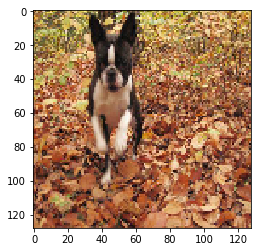

In [6]:
%pylab inline
import matplotlib.pyplot as plt
path =  r'/content/train/000bec180eb18c7604dcecc8fe0dba07.jpg'
img = image.load_img(path, target_size= (row_size , col_size ))
imgplot = plt.imshow(img)
plt.show()

In [7]:
from keras.applications import vgg16
for i, img_id in tqdm(enumerate(df['id'])):
    #Reading the Image using Pre-Processing Function Created Before
    img = read_img(img_id, 'train', (row_size , col_size ))
    x = vgg16.preprocess_input(np.expand_dims(img.copy(), axis=0))
    x_train[i] = x
print('Train Images shape: {} size: {:,}'.format(x_train.shape, x_train.size))
x_train[0]

10222it [00:37, 275.07it/s]

Train Images shape: (10222, 128, 128, 3) size: 502,431,744


array([[[-28.939003  ,   4.2210007 ,  55.32      ],
        [-80.939     , -41.779     ,  -2.6800003 ],
        [ 15.060997  ,  65.221     ,  96.32      ],
        ...,
        [ 30.060997  ,  86.221     , 112.32      ],
        [-26.939003  ,  78.221     ,  96.32      ],
        [-41.939003  ,  22.221     ,  47.32      ]],

       [[-65.939     , -46.779     , -12.68      ],
        [ 19.060997  ,  43.221     ,  70.32      ],
        [ 28.060997  ,  56.221     ,  82.32      ],
        ...,
        [-33.939003  ,  18.221     ,  55.32      ],
        [  6.060997  ,  77.221     , 105.32      ],
        [-30.939003  ,  60.221     ,  88.32      ]],

       [[-51.939003  , -21.779     ,  14.32      ],
        [-31.939003  ,   0.22100067,  37.32      ],
        [-41.939003  , -12.778999  ,  27.32      ],
        ...,
        [-71.939     ,  -0.7789993 ,  44.32      ],
        [-27.939003  ,  30.221     ,  61.32      ],
        [-33.939003  ,  58.221     ,  92.32      ]],

       ...,

      

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [8]:
x_train/=255
x_train[0]

array([[[-0.11348628,  0.01655294,  0.21694118],
        [-0.31740785, -0.1638392 , -0.0105098 ],
        [ 0.05906273,  0.25576863,  0.37772548],
        ...,
        [ 0.11788626,  0.33812156,  0.44047058],
        [-0.10564315,  0.30674902,  0.37772548],
        [-0.16446668,  0.08714118,  0.18556863]],

       [[-0.25858432, -0.18344706, -0.04972549],
        [ 0.07474901,  0.16949412,  0.2757647 ],
        [ 0.11004312,  0.22047451,  0.32282352],
        ...,
        [-0.13309413,  0.0714549 ,  0.21694118],
        [ 0.02376861,  0.30282745,  0.4130196 ],
        [-0.12132943,  0.23616078,  0.34635293]],

       [[-0.20368236, -0.08540784,  0.05615686],
        [-0.125251  ,  0.00086667,  0.14635295],
        [-0.16446668, -0.05011372,  0.10713726],
        ...,
        [-0.28211373, -0.0030549 ,  0.17380393],
        [-0.10956471,  0.11851373,  0.24047059],
        [-0.13309413,  0.22831765,  0.3620392 ]],

       ...,

       [[-0.07034903,  0.00870981,  0.26792157],
        [-0

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
np.random.seed(seed=42)
rnd = np.random.random(len(df))
train_idx = rnd < 0.8
valid_idx = rnd >= 0.8
xtr = x_train[train_idx]
xv = x_train[valid_idx]
ytr = y_train_ohe[train_idx]
yv = y_train_ohe[valid_idx]

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
df_ss = pd.read_csv('sample_submission.csv')
test_img = df_ss['id']

Run the below code to load the test image files in x_test_feature

In [21]:
import cv2
img_rows = 128
img_cols = 128
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f))
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:24<00:00, 428.87it/s]


Normalize the test data and convert it into 4 dimensions

In [22]:
x_test = np.array(x_test_feature,dtype=float32)
print(x_test.shape)
x_test/=255
x_test[0]

(10357, 128, 128, 3)


array([[[0.2627451 , 0.43529412, 0.40784314],
        [0.30588236, 0.38431373, 0.4117647 ],
        [0.2627451 , 0.38039216, 0.36862746],
        ...,
        [0.03137255, 0.21960784, 0.14901961],
        [0.03921569, 0.44705883, 0.39607844],
        [0.04705882, 0.39607844, 0.34901962]],

       [[0.1254902 , 0.36078432, 0.3372549 ],
        [0.1254902 , 0.29411766, 0.30588236],
        [0.24313726, 0.43137255, 0.43137255],
        ...,
        [0.01568628, 0.34509805, 0.3019608 ],
        [0.00784314, 0.34901962, 0.27450982],
        [0.01568628, 0.43529412, 0.3647059 ]],

       [[0.12156863, 0.3137255 , 0.28627452],
        [0.2784314 , 0.43137255, 0.42352942],
        [0.31764707, 0.4627451 , 0.47843137],
        ...,
        [0.05098039, 0.35686275, 0.27058825],
        [0.        , 0.27450982, 0.18431373],
        [0.13333334, 0.58431375, 0.49019608]],

       ...,

       [[0.18431373, 0.34117648, 0.29803923],
        [0.15294118, 0.16078432, 0.14509805],
        [0.23921569, 0

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import optimizers

# neural network model
model = Sequential()
model.add(Convolution2D(128, (5,5), input_shape = (128, 128, 3), kernel_initializer='he_normal', activation = 'relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(64, (3,3), kernel_initializer='he_normal', activation = 'relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256, kernel_initializer='he_normal',activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(120, activation = 'softmax'))

W0702 05:50:29.479051 139829163104128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 05:50:29.678263 139829163104128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 05:50:29.690036 139829163104128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0702 05:50:29.750579 139829163104128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0702 05:50:29.804327 139829163104128 deprec

In [24]:
model.compile(loss = 'categorical_crossentropy',
              #optimizer = optimizers.SGD(lr=0.0001, momentum=0.9),
              optimizer ='adam',
              metrics = ['accuracy'])

W0702 05:50:35.259615 139829163104128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
BATCH_SIZE = 128
EPOCH = 10

In [26]:
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("cnn1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.fit(xtr, ytr, nb_epoch=EPOCH, batch_size=BATCH_SIZE,
          validation_data=(xv, yv), verbose=True, callbacks = [early, checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.
W0702 05:50:42.027150 139829163104128 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8221 samples, validate on 2001 samples
Epoch 1/10
8221/8221 [==============================] - 22s 3ms/step - loss: 5.0651 - acc: 0.0111 - val_loss: 4.7870 - val_acc: 0.0120

Epoch 00001: val_acc improved from -inf to 0.01199, saving model to cnn1.h5
Epoch 2/10
8221/8221 [==============================] - 11s 1ms/step - loss: 4.7854 - acc: 0.0124 - val_loss: 4.7867 - val_acc: 0.0120

Epoch 00002: val_acc did not improve from 0.01199
Epoch 3/10
8221/8221 [==============================] - 11s 1ms/step - loss: 4.7839 - acc: 0.0124 - val_loss: 4.7865 - val_acc: 0.0120

Epoch 00003: val_acc did not improve from 0.01199
Epoch 4/10
8221/8221 [==============================] - 11s 1ms/step - loss: 4.7826 - acc: 0.0124 - val_loss: 4.7864 - val_acc: 0.0120

Epoch 00004: val_acc did not improve from 0.01199
Epoch 5/10
8221/8221 [==============================] - 11s 1ms/step - loss: 4.7813 - acc: 0.0124 - val_loss: 4.7863 - val_acc: 0.0120

Epoch 00005: val_acc did not improve from 0.01

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

#Declaring the Class For Image Augmentation Process(Options are Parameters)
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [0]:
valid_datagen = ImageDataGenerator()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
#Generating the Image From Fectures Declared
train_generator = train_datagen.flow(xtr,ytr)
valid_generator = valid_datagen.flow(xv,yv)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [30]:
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("cnn2.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.fit_generator(train_generator,
                    steps_per_epoch = 8221/32,
                    validation_data = valid_generator,
                    validation_steps = 2001/32,
                    epochs = EPOCH,
                    callbacks = [checkpoint, early])

Epoch 1/10
257/256 [==============================] - 30s 117ms/step - loss: 4.7776 - acc: 0.0124 - val_loss: 4.7888 - val_acc: 0.0120

Epoch 00001: val_acc improved from -inf to 0.01199, saving model to cnn2.h5
Epoch 2/10
257/256 [==============================] - 29s 112ms/step - loss: 4.7763 - acc: 0.0124 - val_loss: 4.7897 - val_acc: 0.0120

Epoch 00002: val_acc did not improve from 0.01199
Epoch 3/10
257/256 [==============================] - 29s 112ms/step - loss: 4.7759 - acc: 0.0122 - val_loss: 4.7904 - val_acc: 0.0120

Epoch 00003: val_acc did not improve from 0.01199
Epoch 4/10
257/256 [==============================] - 29s 113ms/step - loss: 4.7753 - acc: 0.0125 - val_loss: 4.7910 - val_acc: 0.0120

Epoch 00004: val_acc did not improve from 0.01199
Epoch 5/10
257/256 [==============================] - 29s 113ms/step - loss: 4.7754 - acc: 0.0123 - val_loss: 4.7917 - val_acc: 0.0120

Epoch 00005: val_acc did not improve from 0.01199
Epoch 6/10
257/256 [========================

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
#base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),include_top=False, pooling='avg')
base_model = VGG16(weights='imagenet', include_top=False, input_shape = (128, 128, 3))

Print the summary of the base_model

In [32]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
x=base_model.output
x = Flatten()(x)
x=Dense(1024,activation='relu')(x) #we add dense layer 1
x = Dropout(0.5)(x)
x=Dense(256,activation='relu')(x) #dense layer 2
x = Dropout(0.5)(x)
preds=Dense(120,activation='softmax')(x) #final layer with softmax activation

model_vgg=Model(inputs=base_model.input,outputs=preds)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [39]:
EPOCH = 10
model_vgg.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(lr=0.0001, momentum=0.9),
              metrics = ['accuracy'])

# Save the model according to the conditions  
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')

#model_vgg.fit_generator(train_generator,steps_per_epoch = 9242//32 ,validation_data = valid_generator,
#                   validation_steps = 980//32,epochs = EPOCH,callbacks = [checkpoint, early])

model_vgg.fit(xtr, ytr, nb_epoch=EPOCH, batch_size=BATCH_SIZE, validation_data=(xv, yv), verbose=True, callbacks = [early, checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 8221 samples, validate on 2001 samples
Epoch 1/10
8221/8221 [==============================] - 15s 2ms/step - loss: 4.7425 - acc: 0.0186 - val_loss: 4.7377 - val_acc: 0.0255

Epoch 00001: val_acc improved from -inf to 0.02549, saving model to vgg16_1.h5
Epoch 2/10
8221/8221 [==============================] - 15s 2ms/step - loss: 4.7371 - acc: 0.0208 - val_loss: 4.7356 - val_acc: 0.0255

Epoch 00002: val_acc did not improve from 0.02549
Epoch 3/10
8221/8221 [==============================] - 15s 2ms/step - loss: 4.7356 - acc: 0.0224 - val_loss: 4.7351 - val_acc: 0.0270

Epoch 00003: val_acc improved from 0.02549 to 0.02699, saving model to vgg16_1.h5
Epoch 4/10
8221/8221 [==============================] - 15s 2ms/step - loss: 4.7284 - acc: 0.0227 - val_loss: 4.7341 - val_acc: 0.0265

Epoch 00004: val_acc did not improve from 0.02699
Epoch 5/10
8221/8221 [==============================] - 15s 2ms/step - loss: 4.7259 - acc: 0.0230 - val_loss: 4.7324 - val_acc: 0.0300

Epoch 00005

**Using FastAi API with ResNet34 Architecture**

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
newDF = pd.DataFrame() 
newDF['name']=df['filename']
newDF['label']=df['breed']
data = ImageDataBunch.from_df('', newDF, valid_pct=0.2,
                                ds_tfms=get_transforms(), size=299, num_workers=4).normalize(imagenet_stats)

In [20]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.model

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:05<00:00, 17589514.03it/s]


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [11]:
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


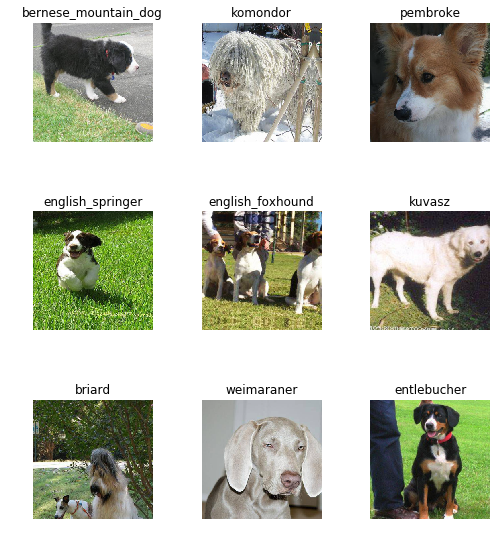

In [12]:
data.show_batch(rows=3, figsize=(7, 8))

In [21]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.546046,0.972078,0.793053,02:40
1,0.987404,0.515386,0.844423,02:33
2,0.681652,0.458709,0.854697,02:32
3,0.566976,0.458427,0.855186,02:32
4,0.456206,0.455042,0.863503,02:32
5,0.378048,0.422488,0.877202,02:32
6,0.308833,0.412061,0.875734,02:32
7,0.232244,0.375449,0.881605,02:33
8,0.191786,0.369871,0.886497,02:31
9,0.171817,0.366770,0.886008,02:33


In [0]:
learn.save('stage-1')

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

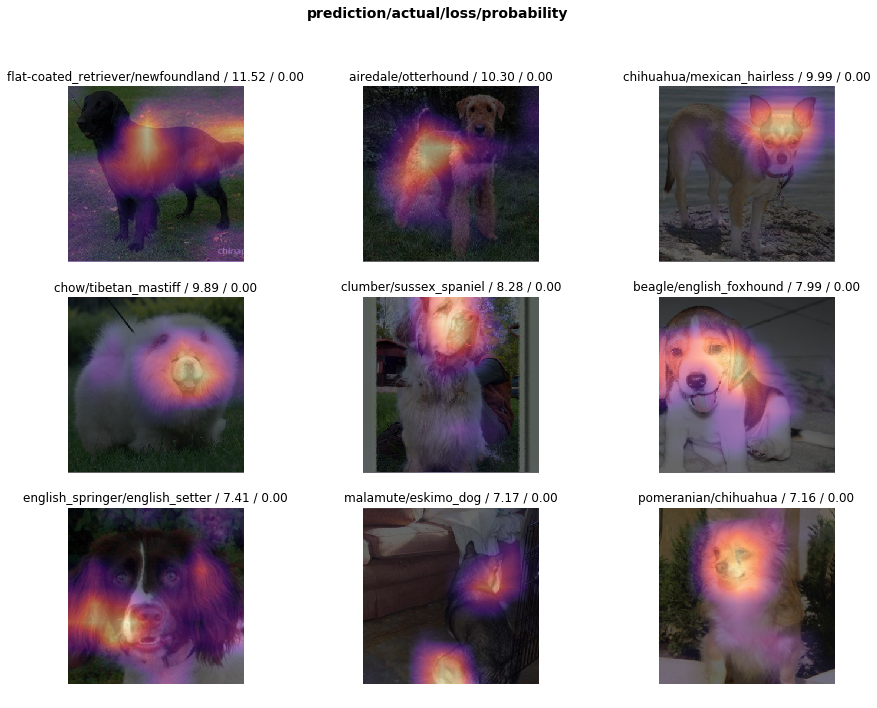

In [25]:
interp.plot_top_losses(9, figsize=(15,11))

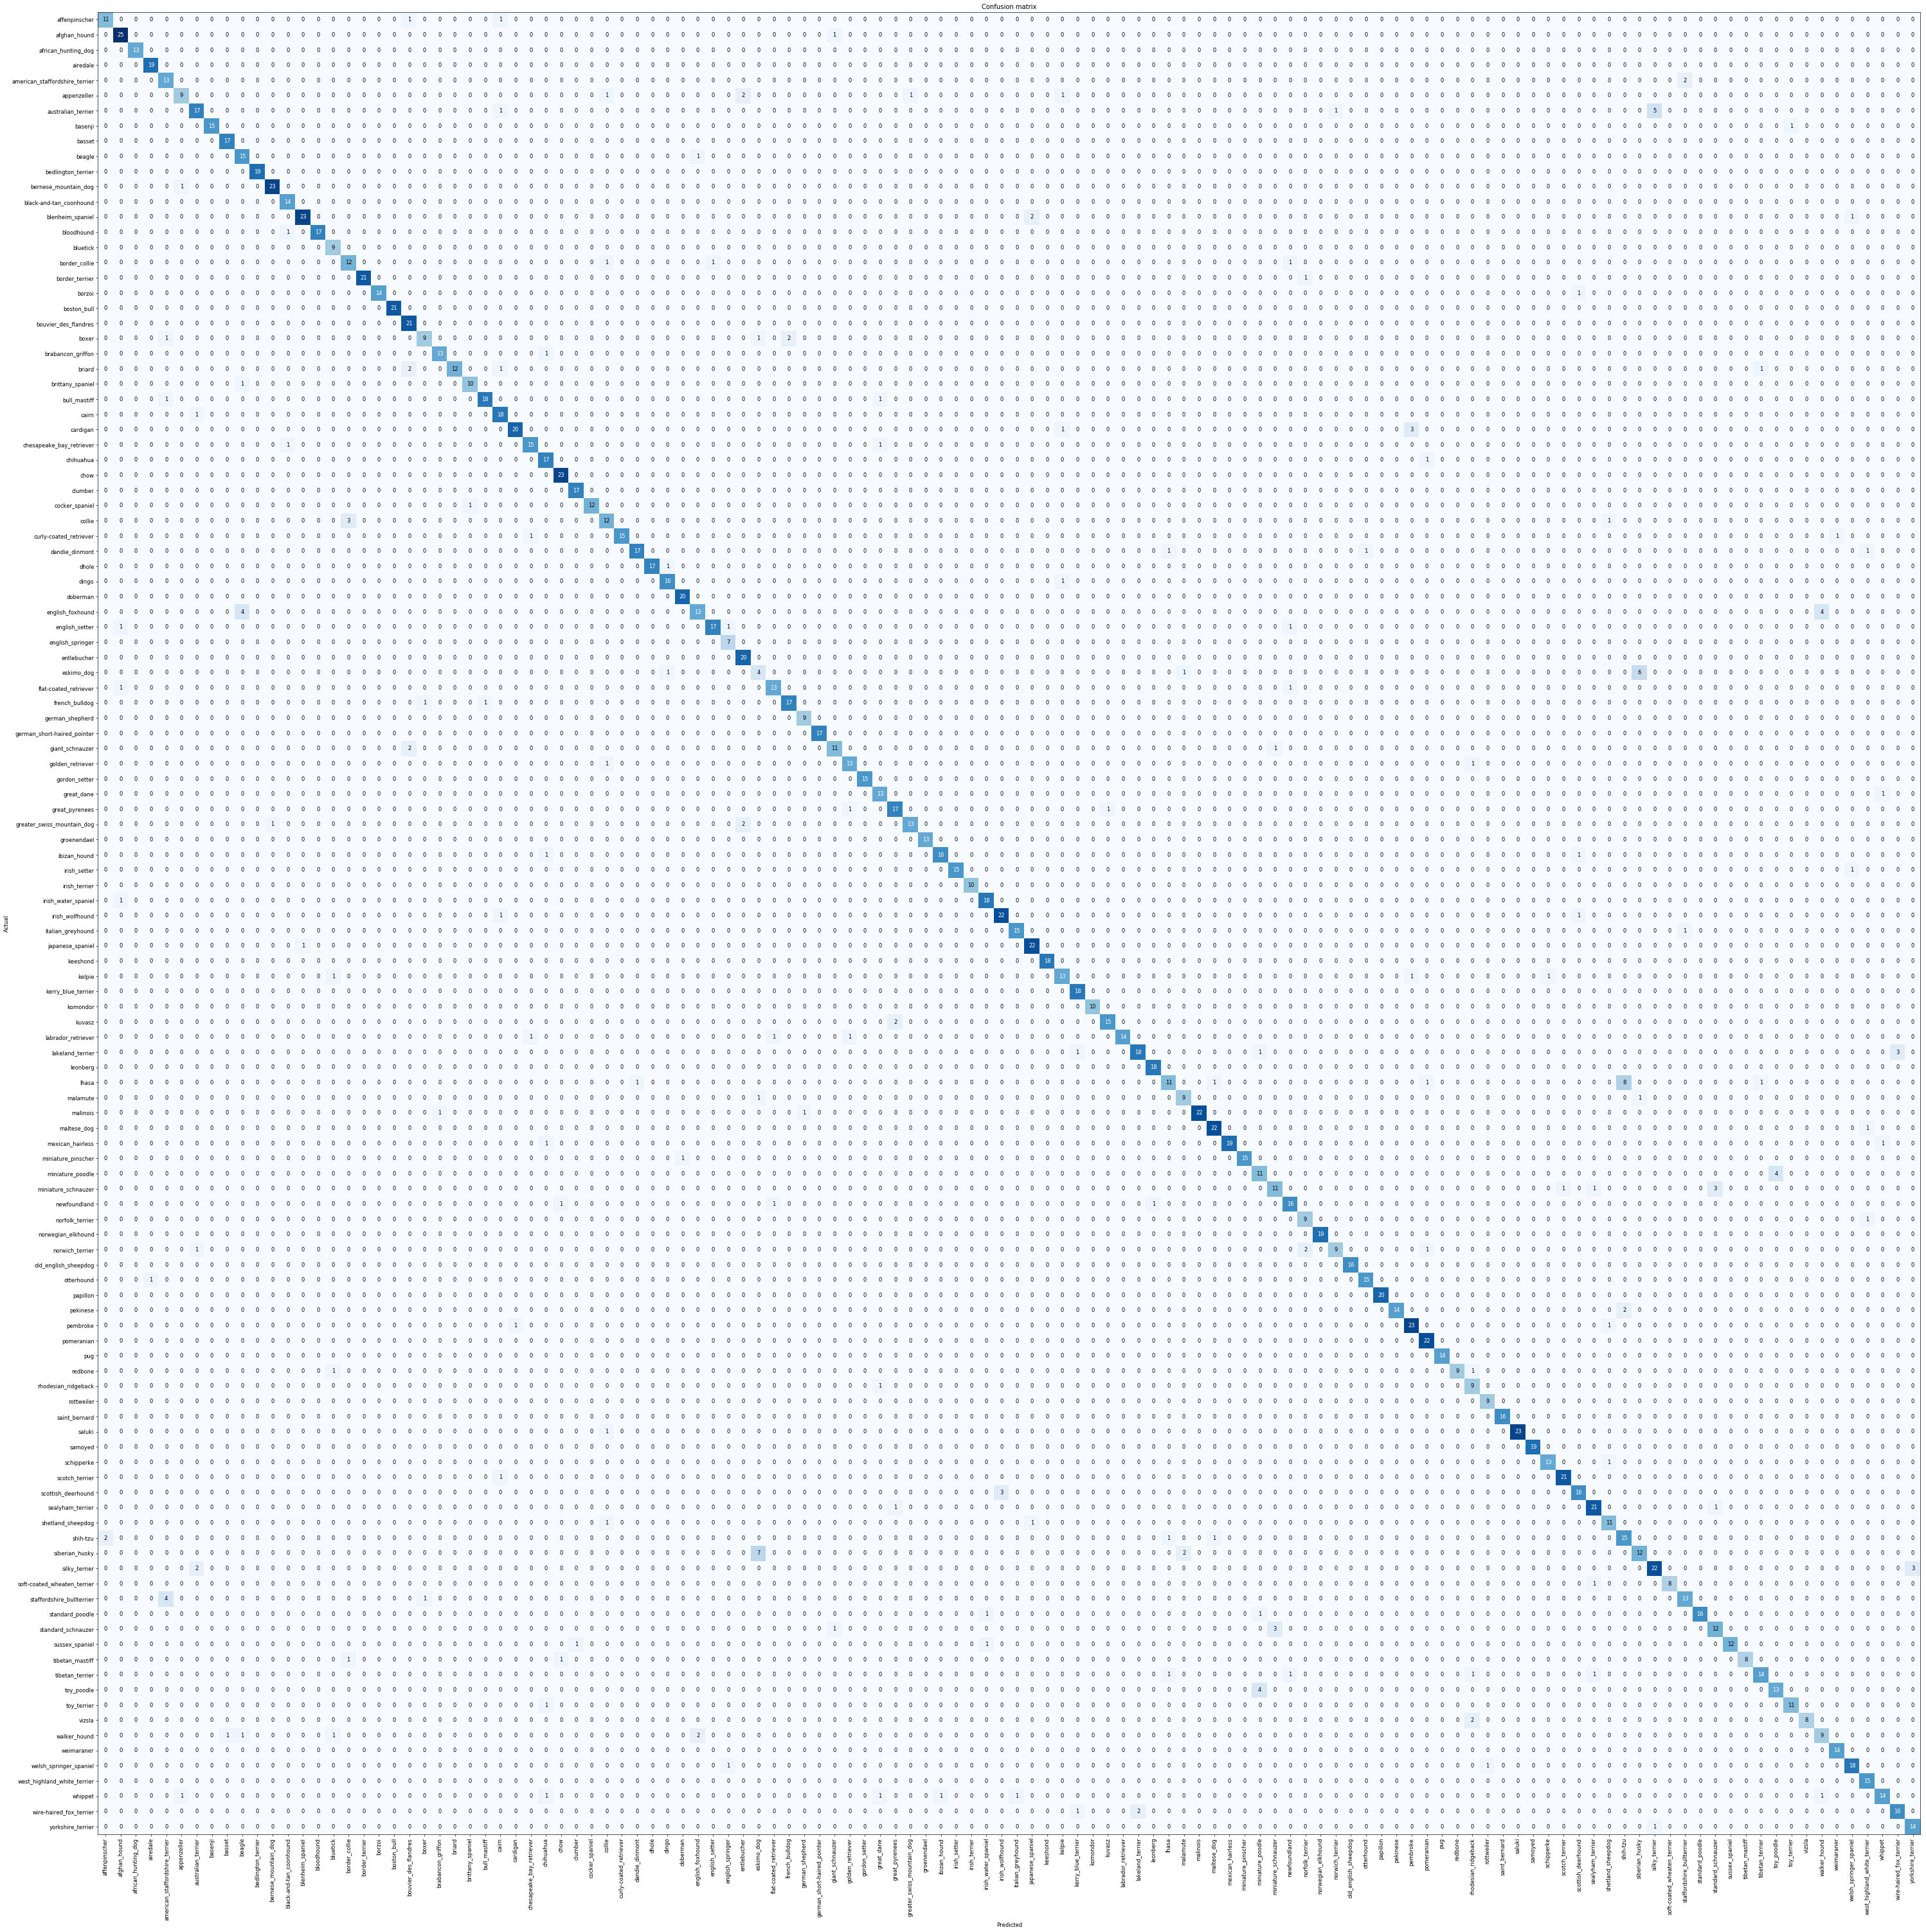

In [26]:
interp.plot_confusion_matrix(figsize=(50,50), dpi=60)

In [27]:
interp.most_confused(min_val=2)

[('lhasa', 'shih-tzu', 8),
 ('siberian_husky', 'eskimo_dog', 7),
 ('eskimo_dog', 'siberian_husky', 6),
 ('australian_terrier', 'silky_terrier', 5),
 ('english_foxhound', 'beagle', 4),
 ('english_foxhound', 'walker_hound', 4),
 ('miniature_poodle', 'toy_poodle', 4),
 ('staffordshire_bullterrier', 'american_staffordshire_terrier', 4),
 ('toy_poodle', 'miniature_poodle', 4),
 ('cardigan', 'pembroke', 3),
 ('collie', 'border_collie', 3),
 ('lakeland_terrier', 'wire-haired_fox_terrier', 3),
 ('miniature_schnauzer', 'standard_schnauzer', 3),
 ('scottish_deerhound', 'irish_wolfhound', 3),
 ('silky_terrier', 'yorkshire_terrier', 3),
 ('standard_schnauzer', 'miniature_schnauzer', 3),
 ('american_staffordshire_terrier', 'staffordshire_bullterrier', 2),
 ('appenzeller', 'entlebucher', 2),
 ('blenheim_spaniel', 'japanese_spaniel', 2),
 ('boxer', 'french_bulldog', 2),
 ('briard', 'bouvier_des_flandres', 2),
 ('giant_schnauzer', 'bouvier_des_flandres', 2),
 ('greater_swiss_mountain_dog', 'entlebuche

In [0]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.299553,1.561791,0.582192,02:29
1,0.776918,0.685760,0.785714,02:29


In [28]:
learn.load('stage-1');
learn.lr_find() 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Text(0.5, 1.0, 'Loss Vs Learning Rate')

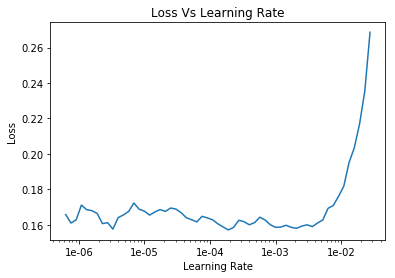

In [29]:
learn.recorder.plot()
plt.title("Loss Vs Learning Rate")

In [30]:
learn.unfreeze() 
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.159621,0.369897,0.887965,03:02
1,0.188303,0.384051,0.886986,03:00
2,0.157074,0.376938,0.888943,03:00
3,0.135120,0.376102,0.888454,03:00
4,0.130680,0.374661,0.886008,03:00


Accuracy of ~88% on Validation set